In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
class AccountsPayableSyntheticDataGenerator:
    def __init__(self, n_samples=30000, anomaly_ratio=0.2):
        """
        Initialize the synthetic data generator
        
        Parameters:
        -----------
        n_samples : int, default 1000
            Total number of invoices to generate
        anomaly_ratio : float, default 0.2
            Proportion of invoices to mark as anomalous
        """
        self.n_samples = n_samples
        self.anomaly_ratio = anomaly_ratio
        self.random_seed = 42
        np.random.seed(self.random_seed)
        
        # Predefined lists for synthetic data
        self.suppliers = [
            "Purple Plumbers Limited", "Blue Builders Inc.", "Green Grocers Co.", 
            "Red Roofing Solutions", "Yellow Yard Services", "Orange Office Supplies"
        ]
        self.currencies = ['USD', 'EUR', 'GBP', 'CAD', 'INR', 'JYP', 'BDT']
        
    def generate_date(self, start_date=datetime(2022, 1, 1), end_date=datetime(2024, 12, 31)):
        """
        Generate a random date within the specified range
        """
        time_between_dates = end_date - start_date
        days_between_dates = time_between_dates.days
        random_number_of_days = np.random.randint(days_between_dates)
        return start_date + timedelta(days=random_number_of_days)
    
    def generate_invoice_number(self, prefix='IN'):
        """
        Generate a synthetic invoice number
        """
        return f"{prefix}{np.random.randint(10000, 99999)}"
    
    def generate_dataset(self):
        """
        Generate a synthetic accounts payable dataset
        """
        data = []
        anomaly_count = int(self.n_samples * self.anomaly_ratio)
        
        for i in range(self.n_samples):
            # Determine if this is an anomalous record
            is_anomaly = i < anomaly_count
            
            # Select supplier
            supplier = np.random.choice(self.suppliers)
            
            # Generate dates
            invoice_date = self.generate_date()
            posting_date = invoice_date + timedelta(days=np.random.randint(1, 5))
            due_date = invoice_date + timedelta(days=30)
            
            # Gross Amount and VAT
            if is_anomaly:
                # Anomalous invoices have extreme values
                gross_amount = np.random.normal(20000, 5000)
                vat_amount = np.random.normal(2000, 500)
            else:
                # Normal invoices have more realistic values
                gross_amount = np.random.normal(5000, 1500)
                vat_amount = np.random.normal(500, 150)
            
            # Randomly decide on payment and debit/credit status
            payment_date = None if np.random.random() > 0.8 else posting_date + timedelta(days=np.random.randint(1, 10))
            debit_credit = np.random.choice(['Dr', 'Cr']) if np.random.random() > 0.5 else None
            
            # Adjust sign based on debit/credit
            if debit_credit == 'Cr':
                gross_amount = -abs(gross_amount)
                vat_amount = -abs(vat_amount)
            
            invoice_record = {
                'Internal Reference': f"100{np.random.randint(10000, 99999)}",
                'Payment Date': payment_date.strftime('%Y-%m-%d') if payment_date else None,
                'Invoice Number': self.generate_invoice_number(),
                'Posting Date': posting_date.strftime('%Y-%m-%d'),
                'Supplier Name': supplier,
                'Supplier Reference': f"V_{supplier.split()[0].upper()}001",
                'Gross Amount': f"{abs(gross_amount):.2f}{'-' if gross_amount < 0 else ''}",
                'Invoice Date': invoice_date.strftime('%Y-%m-%d'),
                'Currency Code': np.random.choice(self.currencies),
                'VAT Amount': f"{abs(vat_amount):.2f}{'-' if vat_amount < 0 else ''}",
                'Due Date': due_date.strftime('%Y-%m-%d'),
                'Debit/Credit': debit_credit,
                'Is Anomaly': is_anomaly
            }
            
            data.append(invoice_record)
        
        # Create DataFrame
        df = pd.DataFrame(data)
        
        # Shuffle the dataset
        df = df.sample(frac=1, random_state=self.random_seed).reset_index(drop=True)
        
        # Convert Gross Amount and VAT Amount to numeric
        df['Gross Amount'] = df['Gross Amount'].apply(lambda x: float(x.rstrip('-')))
        df['VAT Amount'] = df['VAT Amount'].apply(lambda x: float(x.rstrip('-')))
        
        return df

In [ ]:
# Create generator instance
generator = AccountsPayableSyntheticDataGenerator(
    n_samples=30000,  # Total number of invoices
    anomaly_ratio=0.2  # 20% anomalous invoices
)

# Generate dataset
synthetic_dataset = generator.generate_dataset()

# Save to CSV
synthetic_dataset.to_csv('accounts_payable_synthetic_dataset.csv', index=False)

# Print basic information
print("Synthetic Accounts Payable Dataset Generated:")
print(f"Total Invoices: {len(synthetic_dataset)}")
print(f"Anomalous Invoices: {synthetic_dataset['Is Anomaly'].sum()}")

Synthetic Accounts Payable Dataset Generated:
Total Invoices: 1000
Anomalous Invoices: 200


In [5]:
# Dataset Overview
print("\nDataset Overview:")
print(synthetic_dataset.describe(include='all'))

# Anomaly Distribution
print("\nAnomaly Distribution:")
print(synthetic_dataset['Is Anomaly'].value_counts(normalize=True))


Dataset Overview:
       Internal Reference Payment Date Invoice Number Posting Date  \
count                1000          810           1000         1000   
unique                990          496            996          531   
top              10026999   2022-06-06        IN24859   2022-06-11   
freq                    2            5              2            7   
mean                  NaN          NaN            NaN          NaN   
std                   NaN          NaN            NaN          NaN   
min                   NaN          NaN            NaN          NaN   
25%                   NaN          NaN            NaN          NaN   
50%                   NaN          NaN            NaN          NaN   
75%                   NaN          NaN            NaN          NaN   
max                   NaN          NaN            NaN          NaN   

               Supplier Name Supplier Reference  Gross Amount Invoice Date  \
count                   1000               1000   1000.000000 

In [6]:
def visualize_dataset(df):
    """
    Perform visualization on the synthetic dataset
    """
    # Gross Amount Distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df[df['Is Anomaly'] == False]['Gross Amount'].hist(bins=30)
    plt.title('Gross Amount (Normal Invoices)')
    plt.xlabel('Gross Amount')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    df[df['Is Anomaly'] == True]['Gross Amount'].hist(bins=30, color='red')
    plt.title('Gross Amount (Anomalous Invoices)')
    plt.xlabel('Gross Amount')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    df.boxplot(column='Gross Amount', by='Is Anomaly')
    plt.title('Gross Amount Distribution by Anomaly')
    plt.suptitle('')  # Remove automatic suptitle
    
    plt.tight_layout()
    plt.show()
    
    # Supplier-wise Anomaly Analysis
    supplier_anomaly = df.groupby('Supplier Name')['Is Anomaly'].mean()
    print("\nSupplier-wise Anomaly Percentage:")
    print(supplier_anomaly)

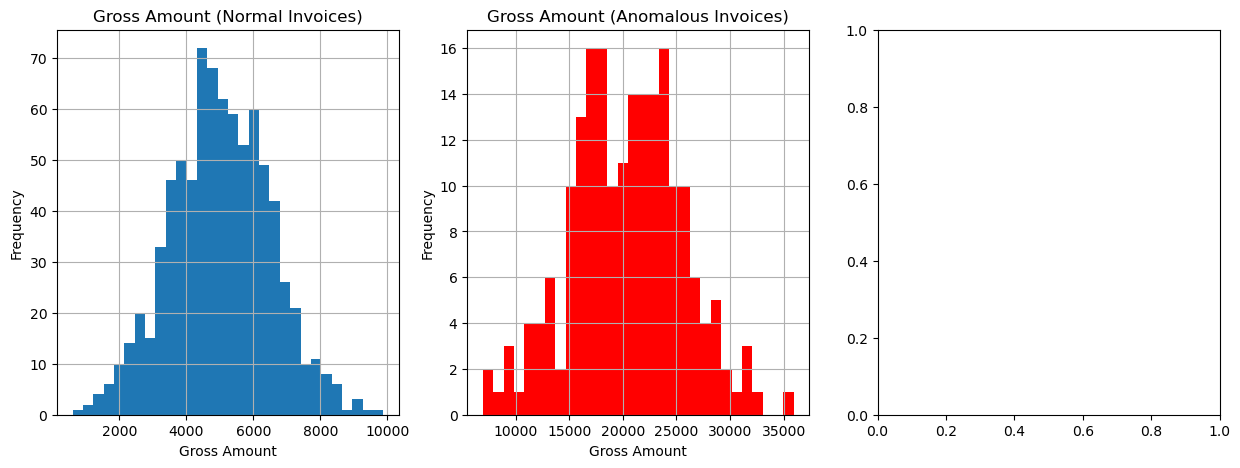

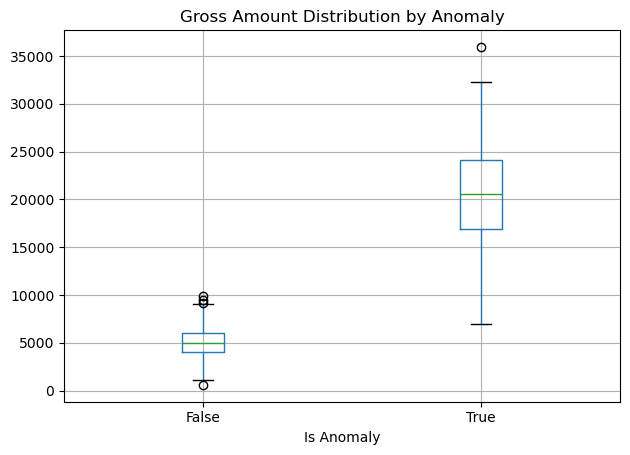


Supplier-wise Anomaly Percentage:
Supplier Name
Blue Builders Inc.         0.277778
Green Grocers Co.          0.236025
Orange Office Supplies     0.155172
Purple Plumbers Limited    0.175000
Red Roofing Solutions      0.154762
Yellow Yard Services       0.205714
Name: Is Anomaly, dtype: float64


In [7]:
visualize_dataset(synthetic_dataset)